# Contents
1. Importing Modules & Acquiring Basic Statistics
2. Data Visualization
3. Feature Scaling
4. Hyperparameter Tuning (Using KNN & Knee Method)
5. Training Model with DBSCAN
6. Get Confusion Matrix, Classification Report and Visualize Results

### Import Necessary Modules

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

### Import the Cluster Table as *cluster_df* and Check First 10 Rows

In [19]:
cluster_df = pd.read_csv('cluster_table.csv')
cluster_df.head(10)

,X,Y,Z,Cluster label
0,1.014886,0.750362,1.156124,1.0
1,-0.197795,0.362302,0.884961,1.0
2,0.628812,2.889340,0.019449,1.0
3,0.642886,2.423315,0.329615,1.0
4,2.197576,-0.903305,1.581067,1.0
5,1.975973,0.372510,0.929662,1.0
6,1.717956,0.536231,1.209356,1.0
7,-0.280465,0.043773,-0.449671,1.0
8,1.282532,1.902875,1.147130,1.0
9,0.814000,0.765601,0.328497,1.0


### Get a Statistical Summary From the Dataframe

In [3]:
print('The shape of the dataframe is - {}'.format(cluster_df.shape))
print('The number of entries - {}'.format(cluster_df.size))
print('-'*60)
print('The basic statistics -\n{}'.format(cluster_df.describe()))
print('-'*60)
print('Unique values per column -\n{}'.format(cluster_df.nunique()))
print('-'*60)
print('Table Info -')
print(cluster_df.info())

The shape of the dataframe is - (200, 4)
The number of entries - 800
------------------------------------------------------------
The basic statistics -
                X           Y           Z  Cluster label
count  200.000000  200.000000  200.000000      200.00000
mean     1.308909    1.546920    2.811882        2.50000
std      1.610548    3.298881    4.299736        1.12084
min     -2.917279   -5.722291   -3.576157        1.00000
25%      0.221763   -0.448100    0.209162        1.75000
50%      1.470579    1.476830    1.080962        2.50000
75%      2.569618    4.053052    3.836479        3.25000
max      3.875920    7.102241   12.035278        4.00000
------------------------------------------------------------
Unique values per column -
X                200
Y                200
Z                200
Cluster label      4
dtype: int64
------------------------------------------------------------
Table Info -
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Dat

### Quick Visuals to Understand Sample Data

**See the scatterplot among features and their distributions grouped by provided cluster labels**

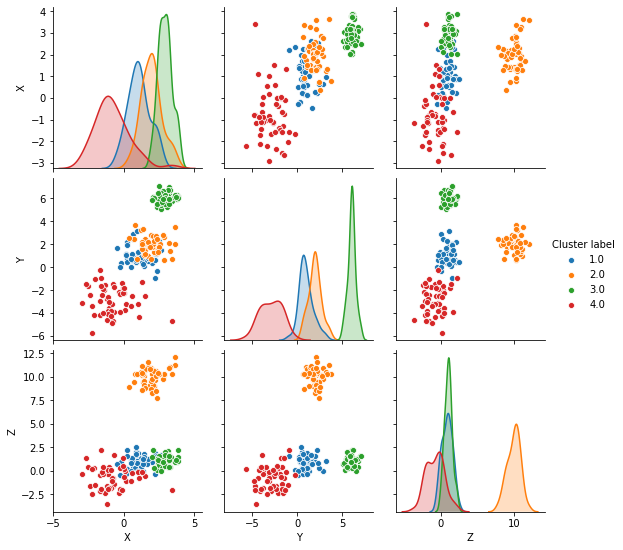

In [4]:
sns.pairplot(cluster_df, hue='Cluster label')
plt.show()

**Compare the individual & ungrouped distributions of our features**

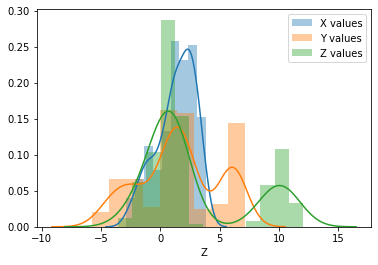

In [5]:
sns.distplot(cluster_df.X, label='X values')
sns.distplot(cluster_df.Y, label='Y values')
sns.distplot(cluster_df.Z, label='Z values')
plt.legend()
plt.show()

**Boxplot to see quartiles & outliers**

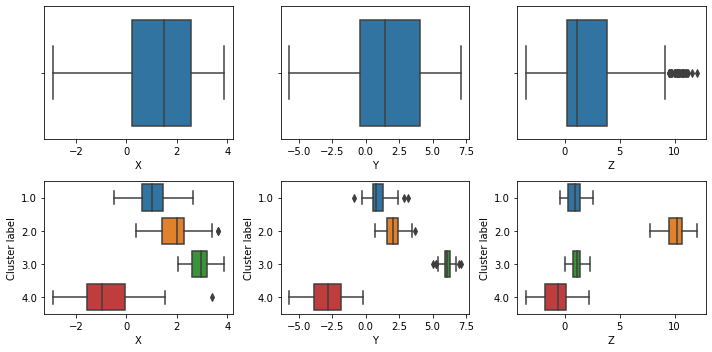

In [6]:
fig, axes = plt.subplots(2,3, figsize=(10,5))
axes = axes.flatten()  # Converting multidimensional "axes" array into a single dimensional array.
# Get the boxplots of features X,Y and Z
ax = sns.boxplot('X', data=cluster_df, orient='h', ax=axes[0])
ax = sns.boxplot('Y', data=cluster_df, orient='h', ax=axes[1])
ax = sns.boxplot('Z', data=cluster_df, orient='h', ax=axes[2])
# Get the boxplots of features X,Y and Z grouped by 'Cluster label'
ax = sns.boxplot(y='Cluster label', x='X', data=cluster_df, orient='h', ax=axes[3])
ax = sns.boxplot(y='Cluster label', x='Y', data=cluster_df, orient='h', ax=axes[4])
ax = sns.boxplot(y='Cluster label', x='Z', data=cluster_df, orient='h', ax=axes[5])
fig.tight_layout()     # Automatically adjust subplot parameters to give specified padding

### Feature Scaling

In [7]:
X = cluster_df[['X', 'Y', 'Z']]
Y_target = cluster_df['Cluster label']
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

### Elbow Method for Approximating Radius of Neighborhood
Steps-
1. Use KNN to find the euclidean distance from a point to its *n$^{th}$* nearest neighbor (As a rule of thumb the number of total neighbors is chosen to be *2 * number of features* which is 6 (*2 * 3*))
2. Sort and plot the distances against each core point
3. Choose the distance around the elbow point as *eps*. 
As a rule of thumb the number of neighbors is chosen to be *2 * number of features* which is 6 (*2 * 3*)

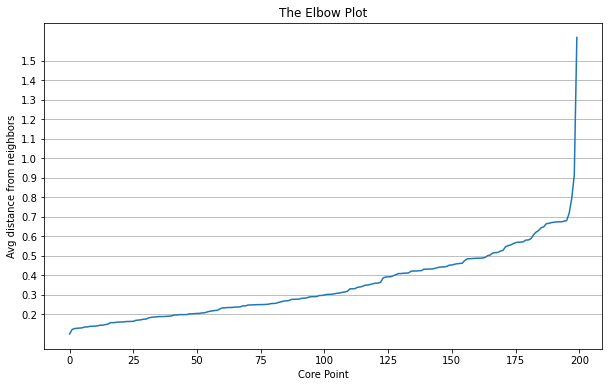

In [8]:
# Storing the distance to the 6th nearest neaighbor to the distance variable
neigh = NearestNeighbors(n_neighbors=6)   # Classifier implementing the 6-nearest neighbors vote
nbrs = neigh.fit(scaled_X)
distances, indices = nbrs.kneighbors(scaled_X)
distances = np.sort(distances, axis=0)
distances = distances[:,5]
# Generate the elbow plot
plt.figure(figsize=(10,6))
plt.plot(distances)
plt.title('The Elbow Plot')
plt.xlabel('Core Point')
plt.ylabel('Avg distance from neighbors')
plt.yticks(np.arange(0.2, 1.6, 0.1))      # Increase density of yticks to help meausuring elbow values visually
plt.grid(axis='y')                        # Display gridlines to help meausuring elbow values visually
plt.show()

### Implementation of DBSCAN for clustering
Hyperparameters -
* ε (eps, the radius of a neighborhood) = 0.54
* minimum number of points required to form a dense region (minPts) = 6 

Note: [It is 6 because there are 3 features and 3 times 2 is 6]

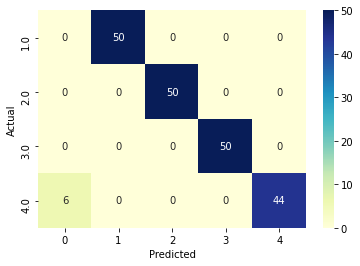


 ****************************** Classification Report ****************************** 

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      1.00      1.00        50
         2.0       1.00      1.00      1.00        50
         3.0       1.00      1.00      1.00        50
         4.0       1.00      0.88      0.94        50

    accuracy                           0.97       200
   macro avg       0.80      0.78      0.79       200
weighted avg       1.00      0.97      0.98       200



In [9]:
# Fit model and get labels
dbscan = DBSCAN(eps=0.54, min_samples=6)
dbscan.fit(scaled_X)
label = dbscan.labels_
# Plot a confusion matrix
df = pd.DataFrame({'Actual': Y_target, 'Predicted': label+1})
ct = pd.crosstab(df['Actual'], df['Predicted'])
sns.heatmap(ct, annot=True, cmap="YlGnBu")
plt.show()
# Display the classification report
print('\n', '*'*30, 'Classification Report', '*'*30, '\n')
print(classification_report(df['Actual'], df['Predicted']))

### Visualization of Results
(A 3D Scatter plot to see the identified clusters and outliers)

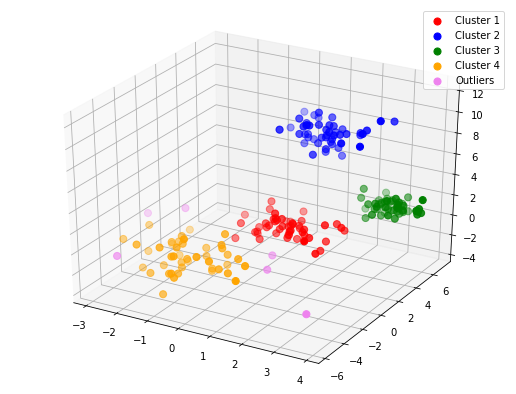

In [45]:
# Creating separate dataframes based on predicted groups or clusters
outliers = cluster_df.iloc[np.where(label==-1)]  # Only contains samples from predicted outlier class
class1 = cluster_df.iloc[np.where(label==0)]     # Only contains samples from predicted class 1
class2 = cluster_df.iloc[np.where(label==1)]     # Only contains samples from predicted class 2
class3 = cluster_df.iloc[np.where(label==2)]     # Only contains samples from predicted class 3
class4 = cluster_df.iloc[np.where(label==3)]     # Only contains samples from predicted class 4
# Generating the 3D figure
fig = plt.figure(figsize=(9,7))
ax = plt.axes(projection='3d')
ax.scatter3D(class1.X, class1.Y, class1.Z, s=50, c='red', label='Cluster 1')
ax.scatter3D(class2.X, class2.Y, class2.Z, s=50, c='blue', label='Cluster 2')
ax.scatter3D(class3.X, class3.Y, class3.Z, s=50, c='green', label='Cluster 3')
ax.scatter3D(class4.X, class4.Y, class4.Z, s=50, c='orange', label='Cluster 4')
ax.scatter3D(outliers.X, outliers.Y, outliers.Z, s=50, c='violet', label='Outliers')
ax.legend()
plt.show()

One **special observation** was that if the features were left unscaled, the results improved. It was seen that for eps=1.57 we clustered 195 samples correctly. But of the 5 misidentiied samples, 2 were predicted to be in cluster 1. When DBSCAN was applied on scaled data, it identified 194 samples correctly. But of the 6 misidentified samples, none of those were identified as part of any other cluster. They were declared outliers. So, in a sense feature scaling dealt with the risk of misplacing samples in wrong clusters. 